In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [24]:
cars=pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [25]:
cars = pd.DataFrame(cars, columns=["HP","VOL","SP","WT","MPG"])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


###**MPG:Milege of the car 
HP:Horse power of the car
VOL:volume of the car
SP:top speed of the car
WT:weight of the car**###

**Linearity**:The relationship btw the predictors(X) nd the response (Y) is linear

**Independence**:Observations are independent of each other.

**Homoscedasticity**:The residuals(Y-Y_hat) exhibit constant variance at all levels of the predictor 

**Normal Distribution of errors**:The residuals of the model are normally distributed

**No multicollinearity**:The independent variables should not be too highly correlated with each other

**EDA**

In [26]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [27]:
cars.isna().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

**observations**

1)There are no missing values

2)There are 81 observations(81 different cars data)

3)The data types of the col are also relevant and valid

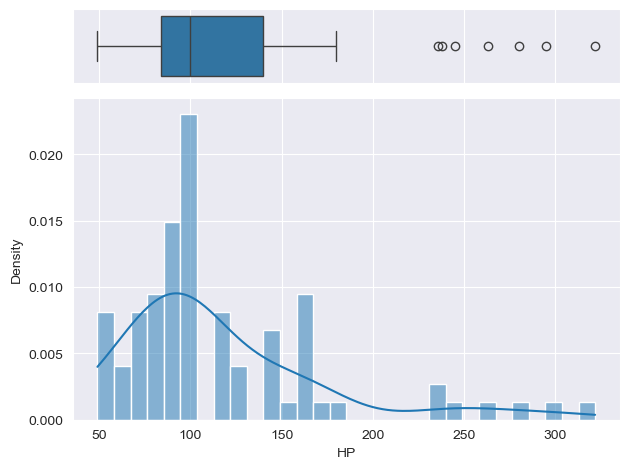

In [28]:
fig, (ax_box, ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15, .65)})
sns.boxplot(data=cars, x='HP', ax=ax_box,orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30,kde=True,stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()


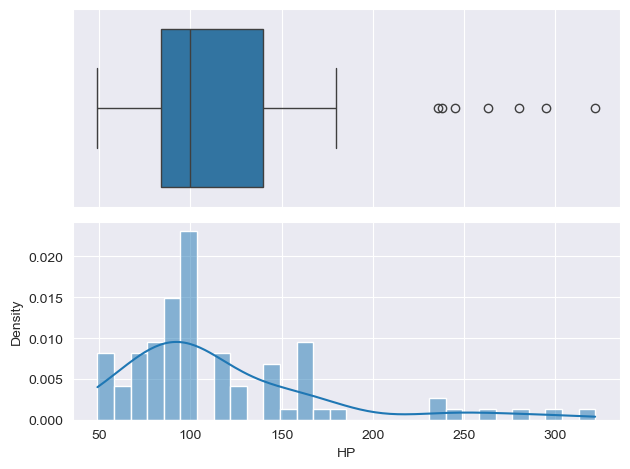

In [29]:
fig, (ax_box, ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.65, .65)})
sns.boxplot(data=cars, x='HP', ax=ax_box,orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30,kde=True,stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

Observations

-THere are some extreme values (outliers) observed in towards the right tail of sp and hp distributions

-In vol anad wt col,a few outliers are observed in both tails of their distributions

-The extreme values of cars data may have come from the specially designed nature of car

-As this is multi_dimensional data,the outliers with respect to spatial dimensions may have to be considered while building the regression model

In [30]:
cars[cars.duplicated()]

,HP,VOL,SP,WT,MPG


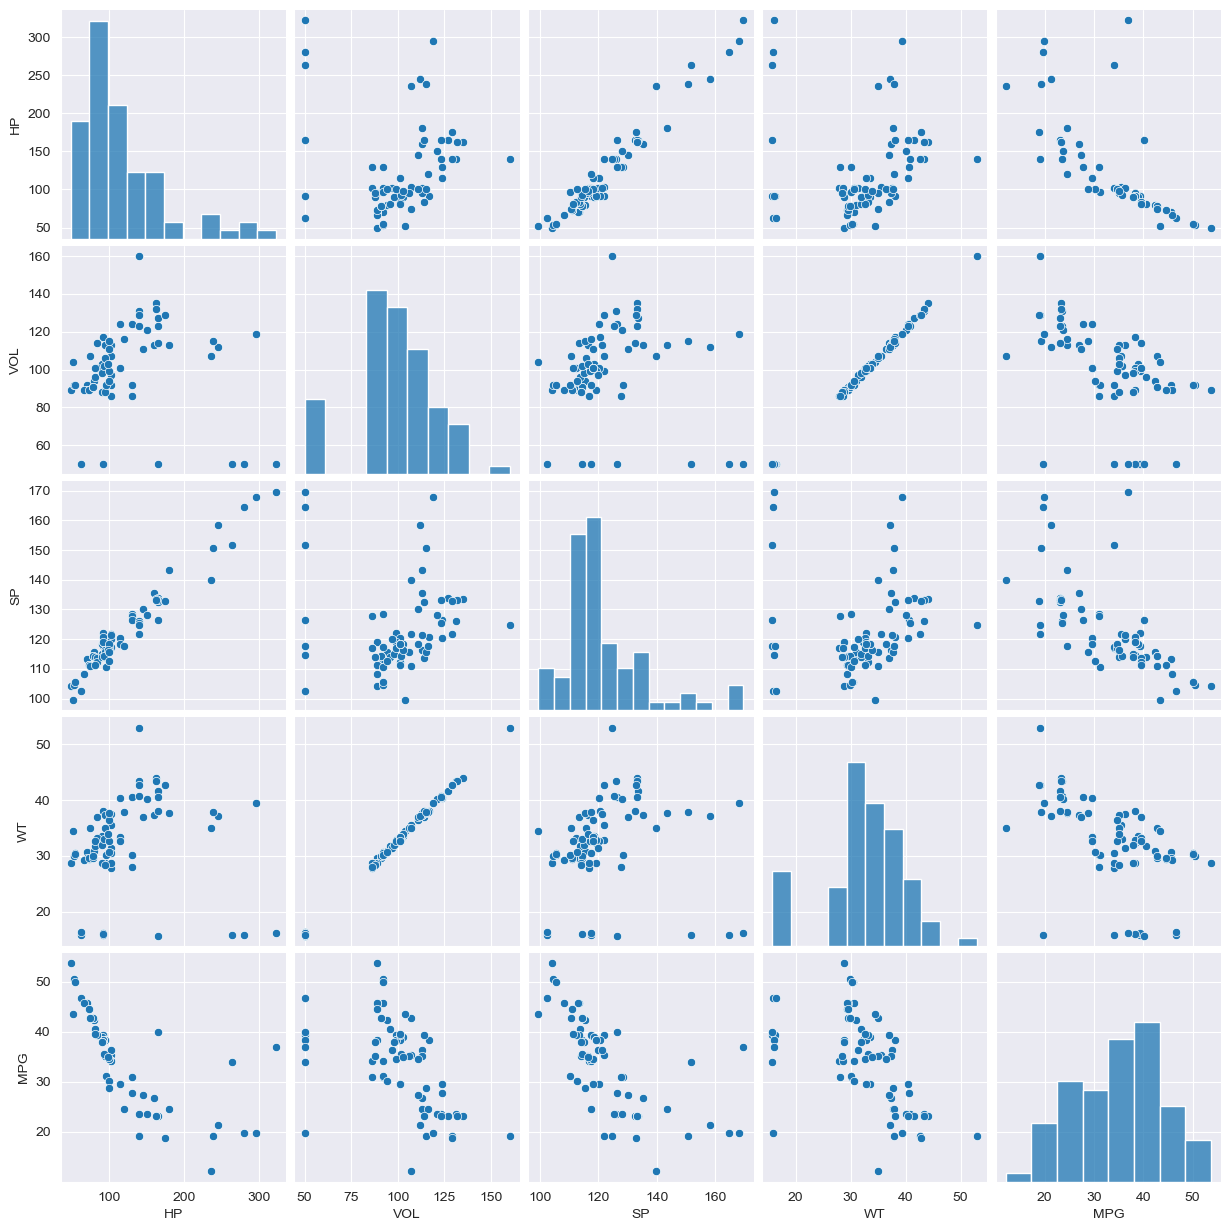

In [31]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

observations

-Btwn x nd y all the x variables are showing moderate to high correlation strngths ,highest being btwn HP and MPG

_Therefore this dataset qualifies for building a multiple linear regression model to predict MPG

_Among x col(x1,x2,x3,x4) some very high correlation strengths are observed SP vs HP,VOL vs WT

_The high correlation among x col is not desirable as it might lead to multicollinearity probelm

In [32]:
import statsmodels.formula.api as smf
model1 = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [33]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        12:05:48   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observations


The R-squared and adjusted R-squared values are good and about 75% of variability iny y is explained by X col

The probability value with respect to F-statistic is close to 0,indicating that all or some of col are significant

The p-values for vol nd wt are higher than 5% indicating some interaction issue among themselves,which need to be further explored

Performance metrics for model1

In [34]:
df1 = pd.DataFrame()
df1["actual_y1"] = cars["MPG"]
df1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [35]:
pred_y1 = model1.predict(cars.iloc[:,0:4])
df1["pred_y1"] = pred_y1
df1.head()

,actual_y1,pred_y1
0,53.700681,43.441935
1,50.013401,42.388793
2,50.013401,42.279341
3,45.696322,42.538360
4,50.504232,42.172648


In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df1["actual_y1"], df1["pred_y1"])
print("MSE :", mse)
print("RMSE :",np.sqrt(mse))

MSE : 18.897141152343096
RMSE : 4.347084212704315


In [37]:
rsq_hp = smf.ols('HP~WT+VOL+SP' ,data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)
rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)
rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)
vif_data = pd.DataFrame({
    'Variable': ['HP', 'WT', 'VOL'],
    'VIF': [vif_hp, vif_wt, vif_vol]
})
vif_data

,Variable,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084


In [38]:
cars1 = cars.drop("WT",axis=1)
cars1.head()

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232


In [39]:
import statsmodels.formula.api as smf
model2 = smf.ols('MPG~HP+VOL+SP',data=cars1).fit()

In [40]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.56e-24
Time:                        12:05:50   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**performance matrix for model2**

In [41]:
df2 = pd.DataFrame()
df2["actual_y2"] = cars["MPG"]
df2.head()

,actual_y2
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [42]:
pred_y2 = model2.predict(cars1.iloc[:,0:4])
df2["pred_y2"] = pred_y2
df2.head()

,actual_y2,pred_y2
0,53.700681,43.590769
1,50.013401,42.256794
2,50.013401,42.256794
3,45.696322,42.361497
4,50.504232,42.269544


In [43]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df2["actual_y2"],df2["pred_y2"])
print("MSE :",mse)
print("RMSE :",np.sqrt(mse))

MSE : 18.911053388711224
RMSE : 4.34868409851891


**observations from model2 summary()**


-The adjusted R-squared value improved slightly to 0.76
-All the p-values for model parameters are less than 5% hence they are significant
-Therefor the HP,VOL,SP, col are finalized as the significant preddictor for the MPG response variable
-There is no improvement in MSE value

In [44]:
cars1.shape

(81, 4)

#### Leverage (Hat Values):
Leverage values diagnose if a data point has an extreme value in terms of the independent variables. A point with high leverage has a great ability to influence the regression line. The threshold for considering a point as having high leverage is typically set at 3(k+1)/n, where k is the number of predictors and n is the sample size.

In [45]:
k=3
n=81
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.14814814814814814

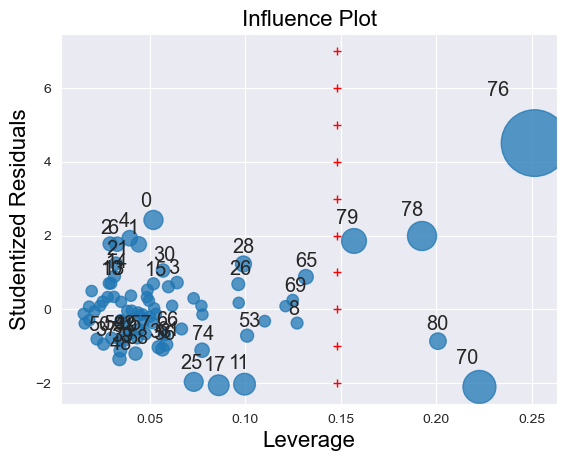

In [48]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1,alpha =0.5)
y=[i for  i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y, 'r+')
plt.show()


Observations
-From the above plot,it is evident that data points 65,70,76,79,80 arevthe influenses

-As their H leverage values are higher and size 

In [49]:
cars1[cars1.index.isin([65,70,76,79,80])]

,HP,VOL,SP,MPG
65,165,50,126.598513,40.050000
70,280,50,164.598513,19.678507
76,322,50,169.598513,36.900000
79,295,119,167.944460,19.833733
80,236,107,139.840817,12.101263


In [51]:
#Discard the data points which are influencers and reassign the row number (reset_index
cars2=cars1.drop(cars1.index[[65,70,76,78,79,80]],axis=0).reset_index(drop=True)
cars2

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232
...,...,...,...,...
70,162,132,133.140074,23.203569
71,140,160,124.715241,19.086341
72,140,129,121.864163,19.086341
73,175,129,132.864163,18.762837


In [52]:
model3 = smf.ols('MPG~VOL+SP+HP',data = cars2).fit()


In [53]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     182.7
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           2.60e-33
Time:                        12:24:31   Log-Likelihood:                -187.46
No. Observations:                  75   AIC:                             382.9
Df Residuals:                      71   BIC:                             392.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6816     11.600      0.404      0.688     -18.448      27.811
VOL           -0.0952      0.021     -4.451      0.000      -0.138      -0.053
SP             0.6342      0.124      5.134      0.000       0.388       0.881
HP            -0.3350      0.034     -9.937      0.000      -0.402      -0.268
==============================================================================
Omnibus:                       20.724   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.198
Skew:                           1.233   Prob(JB):                     1.24e-06
Kurtosis:                       4.619   Cond. No.                     6.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

performance metrices for model3

In [54]:
df3=pd.DataFrame()
df3["actual_y3"] =cars2["MPG"]
df3.head()

,actual_y3
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [55]:
pred_y3 = model3.predict(cars2.iloc[:,0:3])
df3["pred_y3"] = pred_y3
df3.head()

,actual_y3,pred_y3
0,53.700681,45.872002
1,50.013401,44.385430
2,50.013401,44.385430
3,45.696322,44.433742
4,50.504232,44.421272


In [59]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df3["actual_y3"], df3["pred_y3"])
print("MSE :",mse)
print("RMSE :",np.sqrt(mse))

MSE : 8.681197361563033
RMSE : 2.9463871710220015


#### Comparison of models
                     

| Metric         | Model 1 | Model 2 | Model 3 |
|----------------|---------|---------|---------|
| R-squared      | 0.771   | 0.770   | 0.885   |
| Adj. R-squared | 0.758   | 0.761   | 0.880   |
| MSE            | 18.89   | 18.91   | 8.68    |
| RMSE           | 4.34    | 4.34    | 2.94    |


- **From the above comparison table it is observed that model3 is the best among all with superior performance metrics**